Predicting students admission with Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Data Handling

In [ ]:
# Importing data with pandas
data = pd.read_csv("dataset_admissions.csv")
# Showing an overview of our data
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [ ]:
# The shape property returns a tuple representing the dimensionality of the DataFrame  
# The format of shape is (rows, columns)
data.shape 

(400, 4)

In [ ]:
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. W
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [ ]:
data.std()
# std() is to get the standard deviation   
# Standard deviation (S) = square root of the variance
# Variance is the average squared deviations from the mean, while standard deviation is the square root of this number. 

admit      0.466087
gre      115.516536
gpa        0.380567
rank       0.944460
dtype: float64

In [ ]:
#The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear.
pd.crosstab(data['admit'], data['rank'], rownames = ['admitted'])

rank,1,2,3,4
admitted,,,,
0,28,97,93,55
1,33,54,28,12


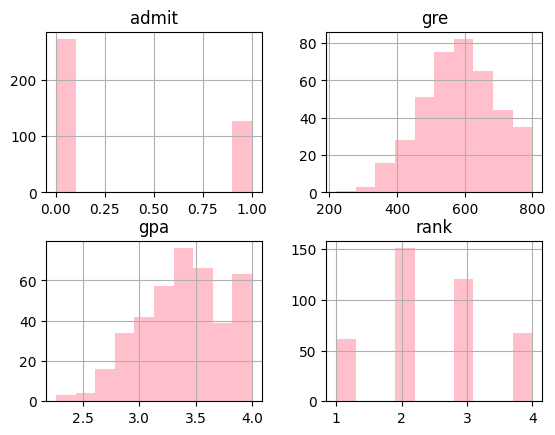

In [ ]:
data.hist(color="pink")
plt.show()

In [ ]:
dummy_rank = pd.get_dummies(data['rank'],prefix="rank") 
dummy_rank.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [ ]:
collumns_to_keep = ['admit','gre','gpa']
data = data[collumns_to_keep].join(dummy_rank[['rank_1','rank_2','rank_3','rank_4']])
data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [ ]:
X = data.drop('admit',axis=1) # In pandas, axis=1 stands for columns
X

,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,380,3.61,0,0,1,0
1,660,3.67,0,0,1,0
2,800,4.00,1,0,0,0
3,640,3.19,0,0,0,1
4,520,2.93,0,0,0,1
...,...,...,...,...,...,...
395,620,4.00,0,1,0,0
396,560,3.04,0,0,1,0
397,460,2.63,0,1,0,0
398,700,3.65,0,1,0,0


In [ ]:
Y = data['admit']
Y

0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 400, dtype: int64

Data Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train,X_test, Y_train,Y_real = train_test_split(X,Y,test_size=0.2)

LIBLINEAR -- A Library for Large Linear Classification
The solvers implemented in the class Logistic Regression are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”. According to Scikit Documentation: The “liblinear” solver was the one used by default for historical reasons before version 0.22. Since then, default use is lbfgs Algorithm.

In [ ]:
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
log_reg = LogisticRegression(solver = 'liblinear')

In [ ]:
#training the model 
log_reg.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
y_pred   

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Observation:
One class is dominating the other. The more is predicting more situations where the result is False. That leads to biases in the model. This model will be biased towards rejecting. After this, we will apply a resampling method and create a new model.

Valuation Analysis: Performance Measurement
Performance Measurement
a) Accuracy

In [ ]:
from sklearn import metrics

In [ ]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy = metrics.accuracy_score(Y_real,y_pred)  
accuracy

0.6375

(b) Precision

In [ ]:
# Precision = true positive / true positive + false positive
precision = metrics.precision_score(Y_real,y_pred)  
precision

0.5

c) Recall

In [ ]:
# Recall = true positive / true positive + false negative
recall = metrics.recall_score(Y_real,y_pred)  
recall

0.06896551724137931

d) Confusion matrix

In [ ]:
import seaborn as sns

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_real,y_pred)
confusion_matrix

array([[49,  2],
       [27,  2]])

<Axes: >

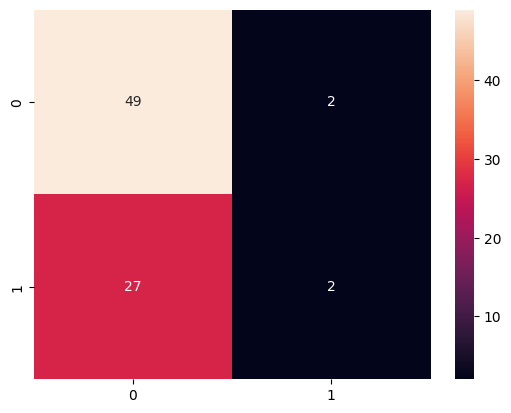

In [ ]:
sns.heatmap(confusion_matrix, annot=True)

Observation:
In here, the data has shown that one class dominates the other. In such a case, the model will have a hard time learning from data to predict future classes. Next, we will apply a resampling method and then use Logistic Regression again. After this, we will also use three other algorithms: Decision Tree and Random Forest. Finally, we will do the Valuation Analisis (Performance Measurement)

Data Handling : Resampling
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. There are two main ways to perform random resampling: Undersampling and Oversampling.

Oversampling — Duplicating samples from the minority class.
Undersampling — Deleting samples from the majority class.
Random Sampling involves creating a new transformed version of the data with a new class distribution. The goal is to reduce the influence of the data on our ML algorithm. Generally, oversampling is preferable as under sampling can result in the loss of important data.

In [ ]:
from sklearn.utils import resample

In [ ]:
# Counting how many admissions are in the dataset 
data[data['admit']==1].count()

admit     127
gre       127
gpa       127
rank_1    127
rank_2    127
rank_3    127
rank_4    127
dtype: int64

In [ ]:
# Counting how many rejections are in the dataset 
data[data['admit']==0].count()

admit     273
gre       273
gpa       273
rank_1    273
rank_2    273
rank_3    273
rank_4    273
dtype: int64

In [ ]:
# Creating variables to store the results 
majority = data[data['admit']==0]
minority = data[data['admit']==1]

In [ ]:
# Applying a resampling strategy (Oversampling) to obtain a more balanced data
minority_upsample = resample(minority, replace = True, n_samples=273, random_state=123) 

In [ ]:
new_data = pd.concat([majority,minority_upsample])
new_data.describe()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,0.500000,599.010989,3.414835,0.188645,0.384615,0.278388,0.148352
std,0.500459,118.855906,0.394142,0.391585,0.486950,0.448617,0.355774
min,0.000000,220.000000,2.260000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.140000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,600.000000,3.445000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,680.000000,3.710000,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
new_data.count() #after resampling or oversampling, we have 546 records

admit     546
gre       546
gpa       546
rank_1    546
rank_2    546
rank_3    546
rank_4    546
dtype: int64

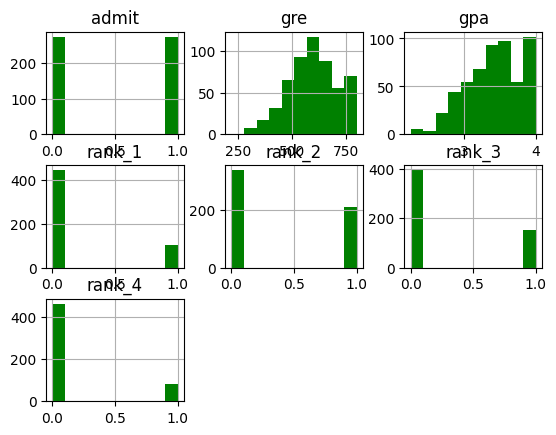

In [ ]:
new_data.hist(color="green")
plt.show()

In [ ]:
# Creating X 
X = new_data.drop("admit",axis=1)
X

,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,380,3.61,0,0,1,0
4,520,2.93,0,0,0,1
7,400,3.08,0,1,0,0
9,700,3.92,0,1,0,0
10,800,4.00,0,0,0,1
...,...,...,...,...,...,...
391,660,3.88,0,1,0,0
5,760,3.00,0,1,0,0
317,780,3.63,0,0,0,1
263,620,3.95,0,0,1,0


In [ ]:
# Creating Y
Y = new_data["admit"]
Y

0      0
4      0
7      0
9      0
10     0
      ..
391    1
5      1
317    1
263    1
277    1
Name: admit, Length: 546, dtype: int64

Part 2 : Data Analysis

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train,X_test,Y_train,Y_real = train_test_split(X,Y,test_size=0.2) # test size will be 20% and train size will be 80%

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

logisticRegression(solver='liblinear')

In [ ]:
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

Accuracy

In [ ]:
from sklearn import metrics

In [ ]:
acc_lg = metrics.accuracy_score(Y_real, y_pred)
acc_lg

0.5727272727272728

presicion

In [ ]:
pre_lg = metrics.precision_score(Y_real, y_pred)
pre_lg

0.6666666666666666

recall

In [ ]:
rec_lg = metrics.recall_score(Y_real, y_pred)
rec_lg

0.5079365079365079

confusion matrix

In [ ]:
cm_lg = metrics.confusion_matrix(Y_real,y_pred)
cm_lg

array([[31, 16],
       [31, 32]])

<Axes: >

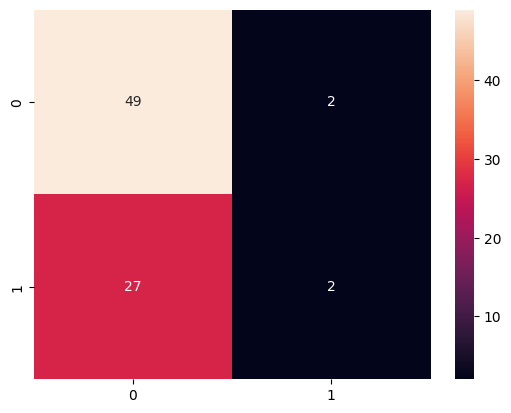

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#Decision Tree
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

Decision Tree - Performance measurement
a) Accuracy

In [ ]:
acc_dt = tree_model.score(X_test,Y_real) 
acc_dt

0.6272727272727273

b) Precision

In [ ]:
pre_dt = metrics.precision_score(Y_real, y_pred)
pre_dt

0.6666666666666666

c) Recall

In [ ]:
rec_dt = metrics.recall_score(Y_real, y_pred)
rec_dt

0.5079365079365079

d) Confusion matrix


In [ ]:
cm_dt = metrics.confusion_matrix(Y_real,y_pred)
cm_dt

array([[31, 16],
       [31, 32]])

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_random_forest = RandomForestClassifier().fit(X_train,Y_train)
y_pred_random_forest = model_random_forest.predict(X_test)
y_pred_random_forest

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

Random Forest - Performance measurement
a) Accuracy

In [ ]:
acc_rf = metrics.accuracy_score(Y_real,y_pred_random_forest)   
acc_rf

0.9

b) Precision

In [ ]:
metrics.precision_score(Y_real, y_pred_random_forest)

0.8714285714285714

c) Recall

In [ ]:
metrics.recall_score(Y_real, y_pred_random_forest)

0.9682539682539683

d) Confusion matrix

In [ ]:
metrics.confusion_matrix(Y_real,y_pred_random_forest)

array([[38,  9],
       [ 2, 61]])

Valuation Analysis: Performance Measurement
In previous, we did the performance measurement of each ML model. Now I'll compare the accuracy of the different models (Accuracy comparison graph).


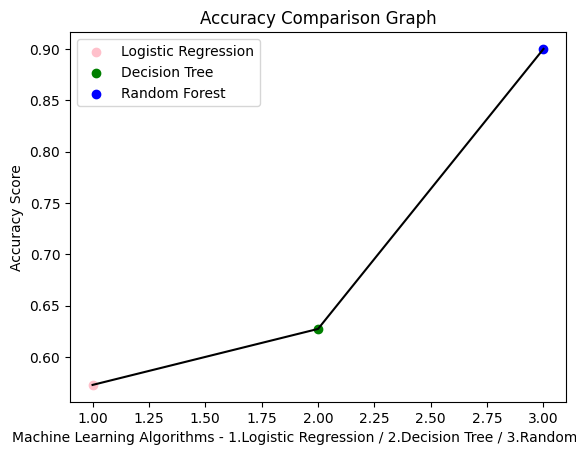

In [ ]:
plt.title("Accuracy Comparison Graph")

plt.ylabel("Accuracy Score")

plt.xlabel("Machine Learning Algorithms - 1.Logistic Regression / 2.Decision Tree / 3.Random Forest")

x = [acc_lg,acc_dt,acc_rf]

plt.plot([1,2,3],x, color = "black")

plt.scatter(1,acc_lg, marker="o", color="pink", label="Logistic Regression")

plt.scatter(2,acc_dt, marker="o", color="green", label="Decision Tree")

plt.scatter(3,acc_rf, marker="o", color = "blue",label = "Random Forest")

plt.legend()

plt.show()